#### `Import Libraries`

In [1]:
# Importing libraries for data manipulation, visualization, and machine learning
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
import joblib
# Library for visualizing missing values
import missingno 
# Importing machine learning utilities from scikit-learn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
## sklearn metrics
from sklearn.metrics import mean_squared_error
## Algorithm 
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

#### `Read Data`

In [2]:
df=pd.read_csv('Data_Train.csv')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

#### `Data Cleaning`

In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


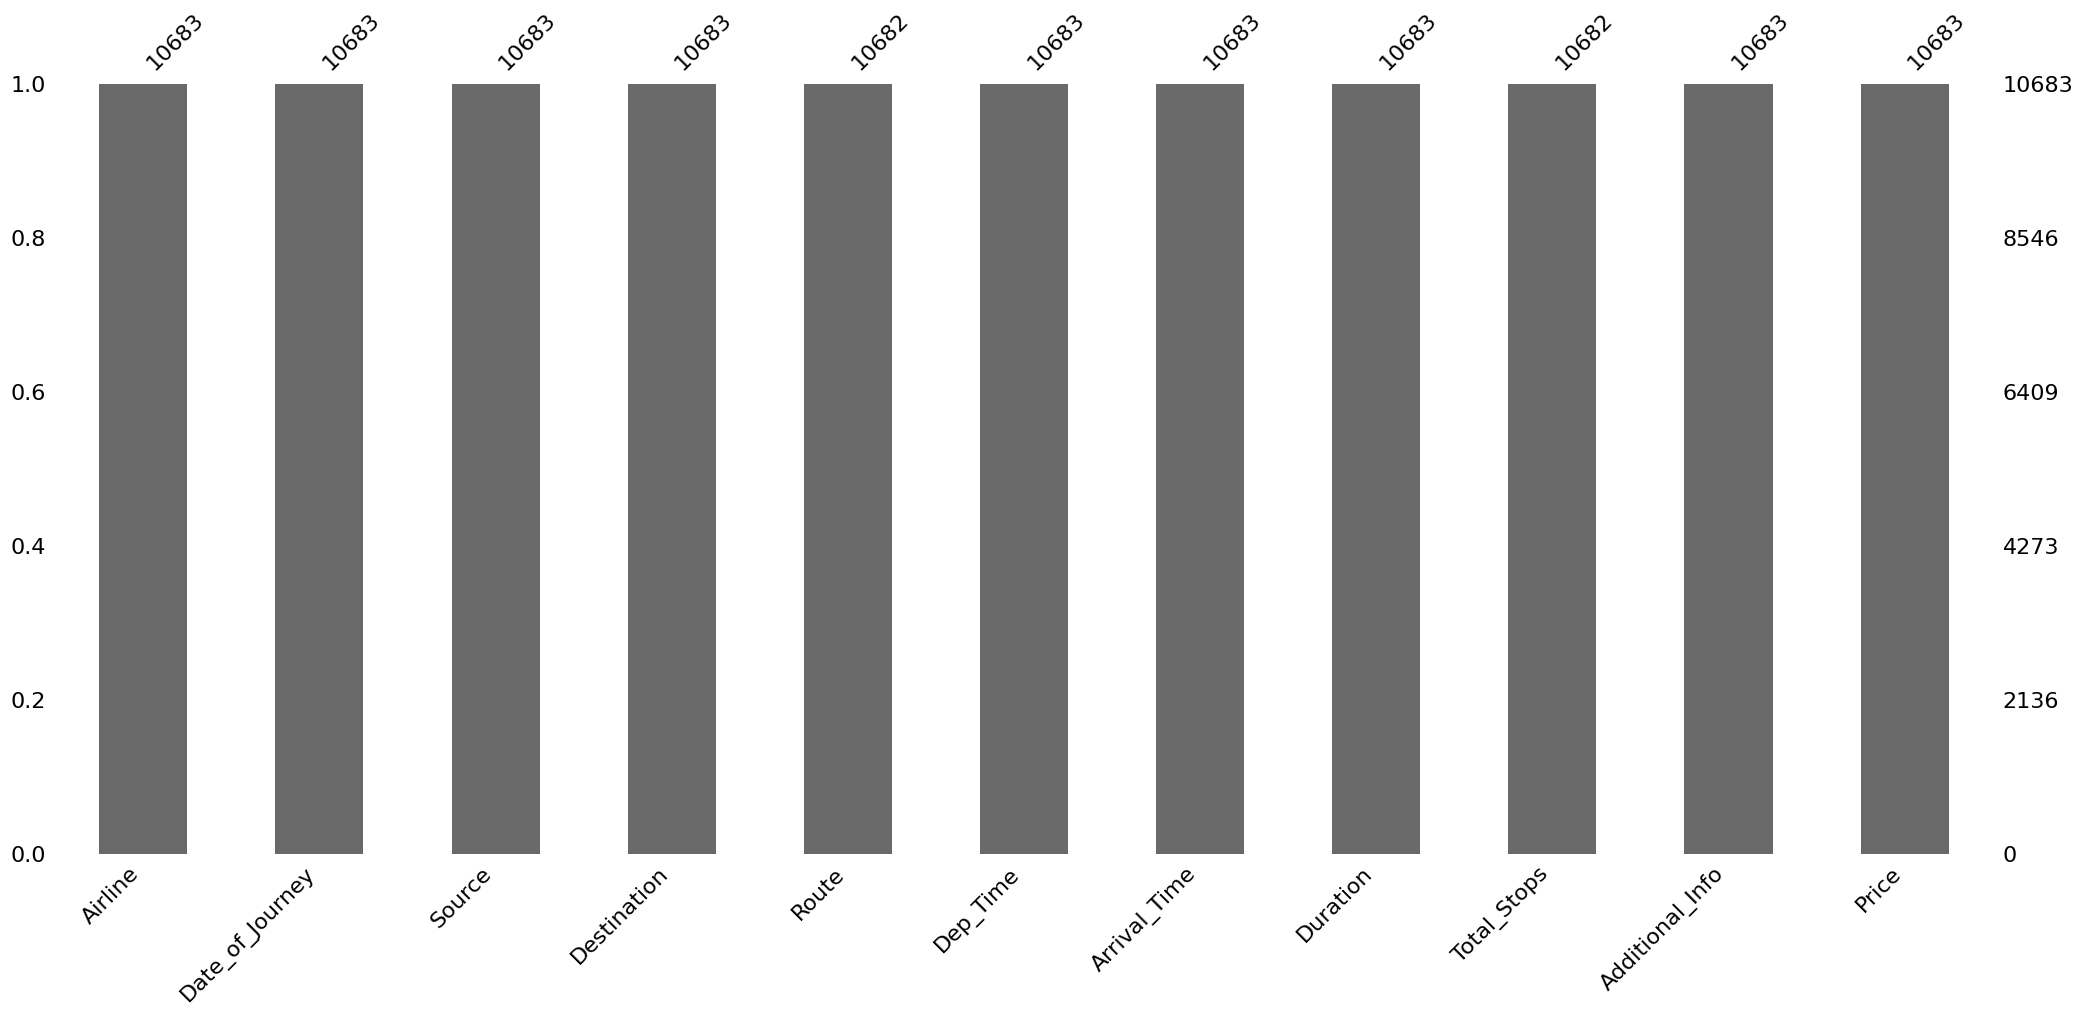

In [6]:
missingno.bar(df)
plt.show()

In [7]:
## Check nulls 
df.isna().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Source             0
Date_of_Journey    0
Dep_Time           0
Destination        0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [8]:
## drop nulls 
df.dropna(inplace=True)

In [9]:
## check duplicates
df.duplicated().sum()

np.int64(220)

In [10]:
## Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


* `Deal With Date Of Journey`   

In [12]:
df['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [13]:
# Convert Date_of_Journey to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [14]:
df['Date_of_Journey'].head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

* `Deal With Total Stop`

In [15]:
# Map Total_Stops to numeric values
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)


In [16]:
df['Total_Stops'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

* `Deal With Arrival Time`

In [17]:
df['Arrival_Time'].head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [18]:
## Split Arrival_Time into Day_Month and Time
df['Arrival_Date'] = df['Arrival_Time'].str.extract(r'(\d{2} \w{3})')  # Extracts day and month
df['Arrival_Time'] = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')  # Extracts time

In [19]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'],format='%H:%M')

In [20]:
df['Arrival_Date'].value_counts().head() , df['Arrival_Time'].value_counts().head()

(Arrival_Date
 10 Jun    234
 22 May    230
 19 May    226
 07 Jun    225
 13 Jun    222
 Name: count, dtype: int64,
 Arrival_Time
 1900-01-01 19:00:00    590
 1900-01-01 19:15:00    533
 1900-01-01 04:25:00    512
 1900-01-01 12:35:00    408
 1900-01-01 21:00:00    360
 Name: count, dtype: int64)

In [21]:
# Convert Arrival_Date and date_of_journey to datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'] + ' 2019', format='%d %b %Y') 

In [22]:
# Calculate the difference between Arrival_Date and date_of_journey
df['days_difference'] = (df['Arrival_Date'] - df['Date_of_Journey']).dt.days

In [23]:
df['days_difference'].value_counts()

days_difference
 1.0    3967
-2.0      84
 4.0      52
 2.0      34
-5.0       4
-1.0       1
Name: count, dtype: int64

In [24]:
df['Unlogical'] = (df['days_difference'] < 0)

In [25]:
df['Unlogical'].value_counts()

Unlogical
False    10373
True        89
Name: count, dtype: int64

In [26]:
# Drop rows where Unlogical is True
df.drop(df[df['Unlogical'] == True].index,inplace=True)

In [27]:
## Check After Drop This Rows 
df[df['days_difference'] < 0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Date,days_difference,Unlogical


In [28]:
df.drop(columns=['days_difference','Unlogical'],axis=1,inplace=True)

* `Deal With Route , Source , Destination` 

In [29]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2092
Mumbai       696
Chennai      380
Name: count, dtype: int64

In [30]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     827
Hyderabad     696
Kolkata       380
Name: count, dtype: int64

In [31]:
df['Route'].unique()

array(['CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU → IXB → BLR',
     

In [32]:
df[['Source','Destination','Route']]

,Source,Destination,Route
1,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Delhi,Cochin,DEL → LKO → BOM → COK
3,Kolkata,Banglore,CCU → NAG → BLR
4,Banglore,New Delhi,BLR → NAG → DEL
5,Kolkata,Banglore,CCU → BLR
...,...,...,...
10678,Kolkata,Banglore,CCU → BLR
10679,Kolkata,Banglore,CCU → BLR
10680,Banglore,Delhi,BLR → DEL
10681,Banglore,New Delhi,BLR → DEL


In [33]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     827
Hyderabad     696
Kolkata       380
Name: count, dtype: int64

In [34]:
df[['Source','Destination','Route']].head(30)

,Source,Destination,Route
1,Kolkata,Banglore,CCU → IXR → BBI → BLR
2,Delhi,Cochin,DEL → LKO → BOM → COK
3,Kolkata,Banglore,CCU → NAG → BLR
4,Banglore,New Delhi,BLR → NAG → DEL
5,Kolkata,Banglore,CCU → BLR
6,Banglore,New Delhi,BLR → BOM → DEL
7,Banglore,New Delhi,BLR → BOM → DEL
8,Banglore,New Delhi,BLR → BOM → DEL
9,Delhi,Cochin,DEL → BOM → COK
10,Delhi,Cochin,DEL → BLR → COK


In [35]:
# Mapping of full names to shortnames
fullname_to_shortname = {
    'Banglore': 'BLR',
    'Delhi': 'DEL',
    'New Delhi': 'DEL',
    'Kolkata': 'CCU',
    'Cochin': 'COK',
    'Mumbai': 'BOM',
    'Hyderabad': 'HYD',
    'Chennai':'MAA'
}

In [36]:
# Replace full names with shortnames in Source and Destination
df['Source'] = df['Source'].replace(fullname_to_shortname)
df['Destination'] = df['Destination'].replace(fullname_to_shortname)

In [37]:
df['Source'].value_counts() , df['Destination'].value_counts()

(Source
 DEL    4345
 CCU    2860
 BLR    2092
 BOM     696
 MAA     380
 Name: count, dtype: int64,
 Destination
 COK    4345
 BLR    2860
 DEL    2092
 HYD     696
 CCU     380
 Name: count, dtype: int64)

In [38]:
## Function to validate Source and Destination
def validate_route(row):
    route_parts = row['Route'].split(' → ')
    source_in_route = route_parts[0]
    destination_in_route = route_parts[-1]
    return row['Source'] == source_in_route and row['Destination'] == destination_in_route


In [39]:
df['Route_Valid'] = df.apply(validate_route, axis=1)

In [40]:
df['Route_Valid'].value_counts()

Route_Valid
True    10373
Name: count, dtype: int64

* `Deal With Depature Time`

In [41]:
df['Dep_Time'].head()

1    05:50
2    09:25
3    18:05
4    16:50
5    09:00
Name: Dep_Time, dtype: object

In [42]:
# Convert Dep_Time to datetime format with hours, minutes, and seconds
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')

In [43]:
df['Dep_Time'].head()

1   1900-01-01 05:50:00
2   1900-01-01 09:25:00
3   1900-01-01 18:05:00
4   1900-01-01 16:50:00
5   1900-01-01 09:00:00
Name: Dep_Time, dtype: datetime64[ns]

In [44]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'],format='%Y-%m-%d %H:%M:%S')

In [45]:
df['Dep_Time'] = df.apply(lambda row: row['Date_of_Journey'].replace(hour=row['Dep_Time'].hour, 
                                                                    minute=row['Dep_Time'].minute, 
                                                                    second=row['Dep_Time'].second) 
                          if row['Dep_Time'].date() == pd.to_datetime('1900-01-01').date() 
                          else row['Dep_Time'], axis=1)

In [46]:
df['Dep_Time'].head()

1   2019-05-01 05:50:00
2   2019-06-09 09:25:00
3   2019-05-12 18:05:00
4   2019-03-01 16:50:00
5   2019-06-24 09:00:00
Name: Dep_Time, dtype: datetime64[ns]

In [47]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Arrival_Date', 'Route_Valid'],
      dtype='object')

In [48]:
df.drop(columns=['Route_Valid','Arrival_Date'],inplace=True,axis=1)

* `Check Total Stops With Route`

In [49]:
df[['Route','Total_Stops']]

,Route,Total_Stops
1,CCU → IXR → BBI → BLR,2
2,DEL → LKO → BOM → COK,2
3,CCU → NAG → BLR,1
4,BLR → NAG → DEL,1
5,CCU → BLR,0
...,...,...
10678,CCU → BLR,0
10679,CCU → BLR,0
10680,BLR → DEL,0
10681,BLR → DEL,0


In [50]:
# Calculate the number of stops from the Route
df['Calculated_Stops'] = df['Route'].str.count('→')-1

# Compare the calculated stops with the Total_Stops
df['Total_Stops_Valid'] = df['Calculated_Stops'] == df['Total_Stops']

df['Total_Stops_Valid'].value_counts()



Total_Stops_Valid
True    10373
Name: count, dtype: int64

In [51]:
df.drop(columns=['Total_Stops_Valid','Calculated_Stops'],axis=1,inplace=True)

##### `Feature Extraction`

In [52]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,2019-05-01,CCU,BLR,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,1900-01-01 13:15:00,7h 25m,2,No info,7662
2,Jet Airways,2019-06-09,DEL,COK,DEL → LKO → BOM → COK,2019-06-09 09:25:00,1900-01-01 04:25:00,19h,2,No info,13882
3,IndiGo,2019-05-12,CCU,BLR,CCU → NAG → BLR,2019-05-12 18:05:00,1900-01-01 23:30:00,5h 25m,1,No info,6218
4,IndiGo,2019-03-01,BLR,DEL,BLR → NAG → DEL,2019-03-01 16:50:00,1900-01-01 21:35:00,4h 45m,1,No info,13302
5,SpiceJet,2019-06-24,CCU,BLR,CCU → BLR,2019-06-24 09:00:00,1900-01-01 11:25:00,2h 25m,0,No info,3873


In [53]:
## Extract hour, min from 'Dep_Time'
df['dep_hour'] = df['Dep_Time'].dt.hour
df['dep_minute'] = df['Dep_Time'].dt.minute


In [54]:
## Extract hour, min , day from 'Arrival_Time'
df['Arrival_hour'] = df["Arrival_Time"].dt.hour
df['Arrival_minute'] = df["Arrival_Time"].dt.minute
df["Arrival_Day"] =df["Arrival_Time"].dt.day

In [55]:
df['Duration'].head()

1    7h 25m
2       19h
3    5h 25m
4    4h 45m
5    2h 25m
Name: Duration, dtype: object

In [56]:
# Split Duration into hours and minutes
df['Duration_Hours'] = df['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
df['Duration_Minutes'] = df['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

In [57]:
df['Duration_Minutes']=df['Duration_Hours']*60 +df['Duration_Minutes']

In [58]:
df['Duration_Minutes']

1         445
2        1140
3         325
4         285
5         145
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Minutes, Length: 10373, dtype: int64

In [59]:
df[['dep_hour','dep_minute','Arrival_hour','Arrival_minute','Duration_Minutes']].head(10)

,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_Minutes
1,5,50,13,15,445
2,9,25,4,25,1140
3,18,5,23,30,325
4,16,50,21,35,285
5,9,0,11,25,145
6,18,55,10,25,930
7,8,0,5,5,1265
8,8,55,10,25,1530
9,11,25,19,15,470
10,9,45,23,0,795


In [60]:
# Validate duration by calculating it from departure and arrival times
def calculate_duration(row):
    dep_total_minutes = row['dep_hour'] * 60 + row['dep_minute']
    arr_total_minutes = row['Arrival_hour'] * 60 + row['Arrival_minute']
    if arr_total_minutes < dep_total_minutes:  # Handle overnight flights
        arr_total_minutes += 24 * 60
    return arr_total_minutes - dep_total_minutes

In [61]:
## Add a validation column for duration
df['Calculated_Duration'] = df.apply(calculate_duration, axis=1)

In [62]:
## Check 
df['Duration_Valid'] = abs(df['Duration_Minutes'] - df['Calculated_Duration']) <=120

In [63]:
df['Duration_Valid'].value_counts()

Duration_Valid
True     9331
False    1042
Name: count, dtype: int64

In [64]:
# Drop rows where Unlogical is True
df.drop(df[df['Duration_Valid'] == False].index,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9331 entries, 1 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9331 non-null   object        
 1   Date_of_Journey      9331 non-null   datetime64[ns]
 2   Source               9331 non-null   object        
 3   Destination          9331 non-null   object        
 4   Route                9331 non-null   object        
 5   Dep_Time             9331 non-null   datetime64[ns]
 6   Arrival_Time         9331 non-null   datetime64[ns]
 7   Duration             9331 non-null   object        
 8   Total_Stops          9331 non-null   int64         
 9   Additional_Info      9331 non-null   object        
 10  Price                9331 non-null   int64         
 11  dep_hour             9331 non-null   int32         
 12  dep_minute           9331 non-null   int32         
 13  Arrival_hour         9331 non-null   

In [66]:
df.describe()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Arrival_Day,Duration_Hours,Duration_Minutes,Calculated_Duration
count,9331,9331,9331,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.0,9331.000000,9331.000000,9331.000000
mean,2019-05-05 06:17:56.411960064,2019-05-05 19:09:57.620833792,1900-01-01 13:39:37.944486400,0.727253,8710.249491,12.461258,24.344658,13.250670,24.592219,1.0,8.073947,512.745686,512.745686
min,2019-03-01 00:00:00,2019-03-01 00:20:00,1900-01-01 00:05:00,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,5.000000,5.000000
25%,2019-04-01 00:00:00,2019-04-01 07:30:00,1900-01-01 08:35:00,0.000000,4990.000000,8.000000,5.000000,8.000000,10.000000,1.0,2.000000,170.000000,170.000000
50%,2019-05-15 00:00:00,2019-05-15 10:00:00,1900-01-01 14:05:00,1.000000,7662.000000,11.000000,25.000000,14.000000,25.000000,1.0,7.000000,435.000000,435.000000
75%,2019-06-06 00:00:00,2019-06-06 07:05:00,1900-01-01 19:15:00,1.000000,11841.000000,18.000000,40.000000,19.000000,35.000000,1.0,12.000000,775.000000,775.000000
max,2019-06-27 00:00:00,2019-06-27 23:55:00,1900-01-01 23:55:00,3.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,1.0,23.000000,1435.000000,1435.000000
std,NaN,NaN,NaN,0.632020,4613.696881,5.740557,18.842631,6.958911,16.622901,0.0,6.343701,378.151687,378.151687


In [67]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'dep_hour', 'dep_minute', 'Arrival_hour',
       'Arrival_minute', 'Arrival_Day', 'Duration_Hours', 'Duration_Minutes',
       'Calculated_Duration', 'Duration_Valid'],
      dtype='object')

In [68]:
# Drop the original datetime columns and any other unimportant columns
df.drop(columns=['Dep_Time', 'Arrival_Time','Additional_Info','Duration','Duration_Valid','Calculated_Duration','Route','Duration_Hours'], inplace=True)

In [69]:
df.isna().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Total_Stops         0
Price               0
dep_hour            0
dep_minute          0
Arrival_hour        0
Arrival_minute      0
Arrival_Day         0
Duration_Minutes    0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(2)

In [71]:
df.drop_duplicates(inplace=True)

#### `EDA & Viz`

* `Univariant Analysis`

In [72]:
df["Price"].value_counts()

Price
10262    213
10844    166
7229     161
4804     160
4823     131
        ... 
6881       1
5268       1
6762       1
16372      1
6273       1
Name: count, Length: 1690, dtype: int64

In [73]:
plt.figure(figsize=(10,5))
hist=px.histogram(data_frame=df,x="Price",title="Histogram")
hist.update_xaxes(title="Price")
hist.update_yaxes(title="frequency")
hist.show()

<Figure size 1000x500 with 0 Axes>

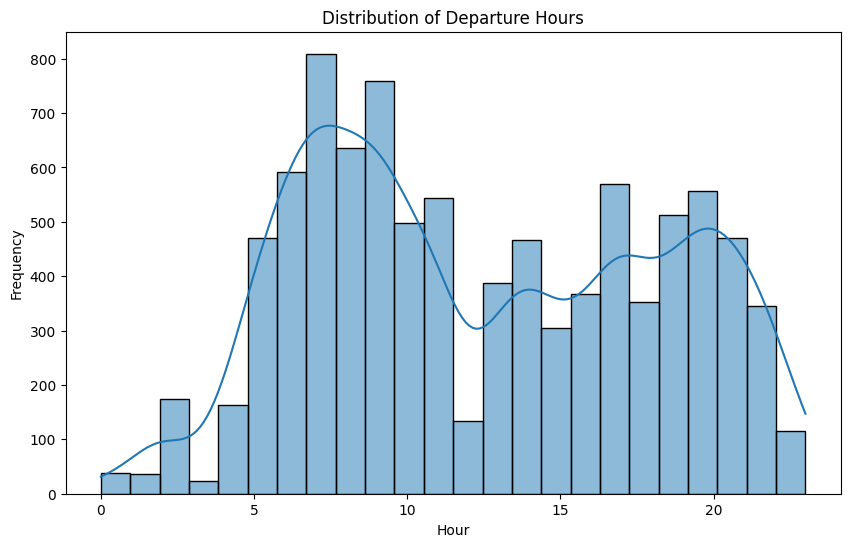

In [74]:
# Example: Distribution of 'Dep_Time' hours
plt.figure(figsize=(10, 6))
sns.histplot(df['dep_hour'], bins=24, kde=True)
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

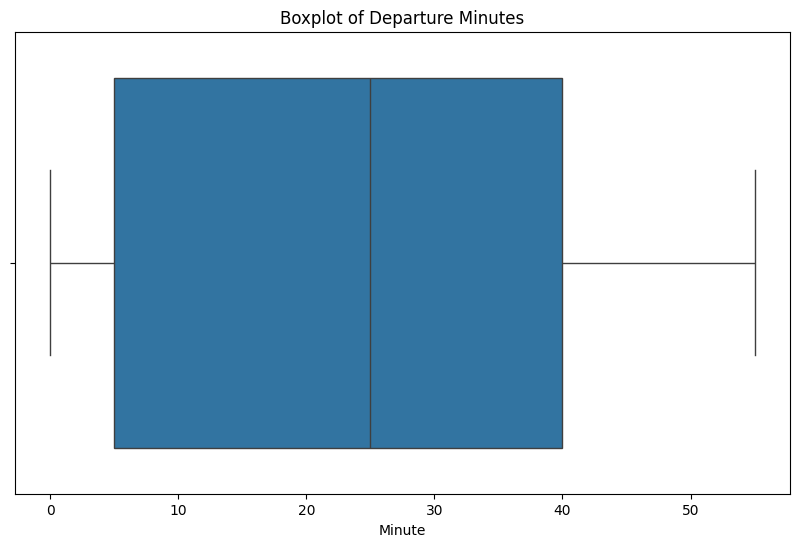

In [75]:
# Boxplot for 'dep_minute'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['dep_minute'])
plt.title('Boxplot of Departure Minutes')
plt.xlabel('Minute')
plt.show()

In [76]:
num_col=df.select_dtypes(include=['float64','int64','int32']).columns

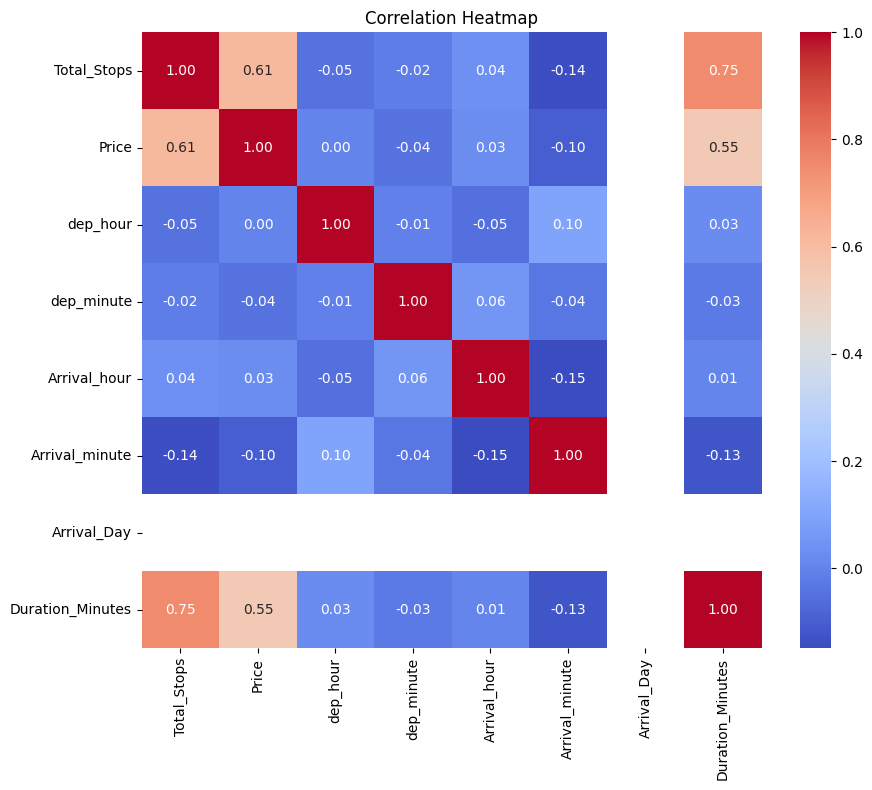

In [77]:
# Correlation heatmap for numerical features
corr_matrix = df[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [78]:
df.duplicated().sum()

np.int64(0)

#### `Split Dataset`

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9329 entries, 1 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           9329 non-null   object        
 1   Date_of_Journey   9329 non-null   datetime64[ns]
 2   Source            9329 non-null   object        
 3   Destination       9329 non-null   object        
 4   Total_Stops       9329 non-null   int64         
 5   Price             9329 non-null   int64         
 6   dep_hour          9329 non-null   int32         
 7   dep_minute        9329 non-null   int32         
 8   Arrival_hour      9329 non-null   int32         
 9   Arrival_minute    9329 non-null   int32         
 10  Arrival_Day       9329 non-null   int32         
 11  Duration_Minutes  9329 non-null   int64         
dtypes: datetime64[ns](1), int32(5), int64(3), object(3)
memory usage: 765.3+ KB


In [80]:
## Features, target
X = df.drop(columns='Price', axis=1)
y = df['Price']

In [81]:
X.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Total_Stops',
       'dep_hour', 'dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Arrival_Day', 'Duration_Minutes'],
      dtype='object')

In [82]:
## split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45)

In [83]:
## Check shapes

print('x_trian shape :',X_train.shape)
print('y_trian shape :',y_train.shape)
print('x_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

x_trian shape : (7463, 11)
y_trian shape : (7463,)
x_test shape : (1866, 11)
y_test shape : (1866,)


In [84]:
numerical_columns = X_train.select_dtypes(include=['float64','int64','int32']).columns
categorical_columns=X_train.select_dtypes(include='object').columns

In [85]:
print('Num cols : ', numerical_columns)
print('Categ Cols :', categorical_columns)

Num cols :  Index(['Total_Stops', 'dep_hour', 'dep_minute', 'Arrival_hour',
       'Arrival_minute', 'Arrival_Day', 'Duration_Minutes'],
      dtype='object')
Categ Cols : Index(['Airline', 'Source', 'Destination'], dtype='object')


#### `Pipeline With Models`

In [86]:
# Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('imputer',SimpleImputer(strategy='median'))
])

# Categorical Pipeline
categ_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

# Combine numerical and categorical pipelines using ColumnTransformer
total_pipeline = ColumnTransformer(transformers=[
    ('num_pipe', num_pipeline, numerical_columns),
    ('categ_pipe', categ_pipeline, categorical_columns)
])

SGD_pipeline = Pipeline(steps=[
    ('preprocessor', total_pipeline),
    ('regressor', SGDRegressor(penalty=None , random_state= 48 , learning_rate='constant', eta0=0.001))])


RF_pipeline=Pipeline(steps=[
    ('preprocessor',total_pipeline),
    ('regressor',RandomForestRegressor(n_estimators=100, random_state=42))
])


* `SGD Regressor`

In [87]:
SGD_pipeline.fit(X_train,y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipe', ...), ('categ_pipe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [88]:
y_pred_train_sgd=SGD_pipeline.predict(X_train)

In [89]:
y_pred_test_sgd=SGD_pipeline.predict(X_test)

In [90]:
## Evaluate Using RMSE

rmse_train_sgd=np.sqrt(mean_squared_error(y_pred_train_sgd,y_train))
rmse_test_sgd=np.sqrt(mean_squared_error(y_pred_test_sgd,y_test))

print(f'RMSE of Training Dataset using SGD Regression is: {rmse_train_sgd:.3f}')
print(f'RMSE of Testing Dataset using SGD Regression is: {rmse_test_sgd:.3f}')   ## No overfitting

RMSE of Training Dataset using SGD Regression is: 2949.383
RMSE of Testing Dataset using SGD Regression is: 3309.508


* `Random Forest`

In [91]:
RF_pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipe', ...), ('categ_pipe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [92]:
y_pred_train_rf=RF_pipeline.predict(X_train)

In [93]:
y_pred_test_rf=RF_pipeline.predict(X_test)

In [94]:
## Evaluate Using RMSE

rmse_train_rf=np.sqrt(mean_squared_error(y_pred_train_rf,y_train))
rmse_test_rf=np.sqrt(mean_squared_error(y_pred_test_rf,y_test))

print(f'RMSE of Training Dataset using RF Regression is: {rmse_train_rf:.3f}')
print(f'RMSE of Testing Dataset using RF Regression is: {rmse_test_rf:.3f}')  

RMSE of Training Dataset using RF Regression is: 2075.379
RMSE of Testing Dataset using RF Regression is: 2895.516


In [95]:
joblib.dump(RF_pipeline, "flight_price_model.pkl")

['flight_price_model.pkl']

In [96]:
joblib.dump(X.columns,"Inputs.pkl")

['Inputs.pkl']